In [4]:
import models
from models import model, create_cd_cluster, cd_diagram, bt_plot,glrt
from dataset_management import get_dataset, convert_to_autorank
from autorank import autorank, create_report, plot_stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

algorithm="algorithm";benchmark="bench_prior";seed="seed";budget="used_fidelity";loss="normalized_regret"
ds=get_dataset(dataset_name="fig5_24_at25_bad_intsteps")

In [11]:
ds=ds.loc[ds[algorithm].isin(["HB","PB","RS"])]
loss="normalized_regret"


def relation_generator(df,budget_range,algos,loss="normalized_regret"):
    relation=[]
    budgets=[x for x in df[budget].unique() if budget_range[0] <= x <= budget_range[1]]
    for f, f_next in zip(budgets, budgets[1:]) :
        model_difference=model(formula=f"{loss} ~ {algorithm} + (1|{benchmark})",data=df.loc[df[budget].between(f,f_next,inclusive='left')],system_id=algorithm)
        contrast=model_difference.post_hoc(algorithm)[1]
        contrast_algos=contrast.loc[(contrast["Contrast"].str.contains(algos[0]))&(contrast["Contrast"].str.contains(algos[1]))]
        relation.append(0 if contrast_algos["P-val"][0]>0.05 else 1 if contrast_algos["Estimate"][0]>0 else -1)
    return relation,budgets[:-1]

relations={}
prior_combs=[["bad"],["at25"],["at25","bad"]]
for priors in prior_combs:
    relations[' '.join(priors)]=relation_generator(ds.loc[ds["prior"].isin(priors)],[0,24],["PB","HB"])

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for fa

Priors bad
Overtaking points: [18.0]
Reovery points: [10.0]

Priors at25
Overtaking points: [0]
Reovery points: [0]

Priors at25 & bad
Overtaking points: [9.0]
Reovery points: [4.0]



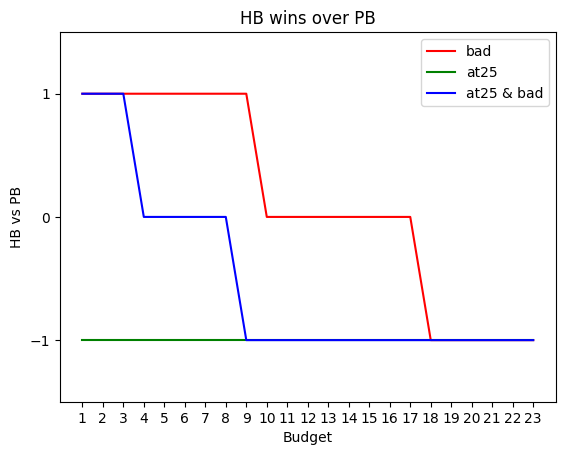

In [12]:
colors=["red","green","blue"]
for p_n,priors in enumerate(prior_combs):
    overtaking = []
    recovering = []
    relation,budgets=relations[' '.join(priors)]
    for i in range(len(relation)-1):
        if relation[i] >-1 and relation[i+1] == -1:
            overtaking.append(budgets[i+1])
        elif relation[i] == 1 and relation[i+1] == 0:
            recovering.append(budgets[i+1])
    if not overtaking:
        overtaking.append(0)
    if not recovering:
        recovering.append(0)
    print(f"Priors {' & '.join(priors)}")
    print(f"Overtaking points: {overtaking}")
    print(f"Reovery points: {recovering}\n")
    plt.plot(budgets, relation,color=colors[p_n],label=" & ".join(priors))
plt.legend()
plt.yticks([-1,0,1])
plt.ylim(-1.5,1.5)
plt.xticks(budgets)
plt.xlabel('Budget')
plt.ylabel('HB vs PB')
plt.title('HB wins over PB')
plt.show()


In [7]:
loss="simple_regret"
for f in range(1,12):
    model_no_difference=model(formula=f"{loss} ~ (1|{benchmark})",data=ds.loc[ds[budget].between(f,f+0.5)],system_id=algorithm)
    model_difference=model(formula=f"{loss} ~ {algorithm} + (1|{benchmark})",data=ds.loc[ds[budget].between(f,f+0.5)],system_id=algorithm)
    print(f"\nAt {f} to {f+0.5}")
    glrt(model_no_difference,model_difference,names=["no_difference","difference"])
    print(model_difference.post_hoc(algorithm)[1])


At 1 to 1.5
no_difference (-9625.95) << difference (-9553.21)
Chi-Square: 145.46109756779333, P-Value: 0.0
  Contrast  Estimate  2.5_ci  97.5_ci     SE      DF  T-stat  P-val  Sig
1  PB - HB     6.308   5.298    7.318  0.515  2376.0  12.248    0.0  ***

At 2 to 2.5
no_difference (-6265.15) << difference (-6231.89)
Chi-Square: 66.52926308079077, P-Value: 3.3306690738754696e-16
  Contrast  Estimate  2.5_ci  97.5_ci     SE      DF  T-stat  P-val  Sig
1  PB - HB     1.058   0.805    1.311  0.129  2376.0   8.214    0.0  ***

At 3 to 3.5
no_difference (-4290.06) << difference (-4213.23)
Chi-Square: 153.66941752331695, P-Value: 0.0
  Contrast  Estimate  2.5_ci  97.5_ci     SE      DF  T-stat  P-val  Sig
1  PB - HB     0.702   0.593    0.811  0.056  2376.0    12.6    0.0  ***

At 4 to 4.5
no_difference (-1948.93) << difference (-1945.21)
Chi-Square: 7.450117026666248, P-Value: 0.00634323247496682
  Contrast  Estimate  2.5_ci  97.5_ci     SE      DF  T-stat  P-val Sig
1  PB - HB    -0.059  -0.

In [6]:
loss="normalized_regret"
for f in range(1,12):
    model_no_difference=model(formula=f"{loss} ~ (1|{benchmark})",data=ds.loc[ds[budget].between(f,f+0.5)],system_id=algorithm)
    model_difference=model(formula=f"{loss} ~ {algorithm} + (1|{benchmark})",data=ds.loc[ds[budget].between(f,f+0.5)],system_id=algorithm)
    print(f"\nAt {f} to {f+0.5}")
    glrt(model_no_difference,model_difference,names=["no_difference","difference"])
    print(model_difference.post_hoc(algorithm)[1])


At 1 to 1.5
no_difference (-379.24) << difference (-33.93)
Chi-Square: 690.6162105508308, P-Value: 0.0
  Contrast  Estimate  2.5_ci  97.5_ci    SE      DF  T-stat  P-val  Sig
1  PB - HB     0.277   0.258    0.297  0.01  2376.0   28.31    0.0  ***

At 2 to 2.5
no_difference (1949.61) << difference (1986.41)
Chi-Square: 73.60606535059105, P-Value: 0.0
  Contrast  Estimate  2.5_ci  97.5_ci     SE      DF  T-stat  P-val  Sig
1  PB - HB     0.036   0.028    0.045  0.004  2376.0   8.646    0.0  ***

At 3 to 3.5
no_difference (2541.16) << difference (2558.74)
Chi-Square: 35.15973886537813, P-Value: 3.037386009374643e-09
  Contrast  Estimate  2.5_ci  97.5_ci     SE      DF  T-stat  P-val  Sig
1  PB - HB      0.02   0.013    0.026  0.003  2376.0   5.952    0.0  ***

At 4 to 4.5
no_difference (2917.61) == difference (2917.87)
Chi-Square: 0.5339528598678953, P-Value: 0.46494971963483966
  Contrast  Estimate  2.5_ci  97.5_ci     SE      DF  T-stat  P-val Sig
1  PB - HB     0.002  -0.004    0.008 